In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from datetime import datetime
import os
import time
pd.options.display.float_format ='{:,.3f}'.format

# Парсинг Мосбиржи

- Взять топ 50 компаний по рыночной капитализации (цена акции * количество акций ~ стоимость компании)
- Получить данные по стоимости акций каждой компании (ежедневные значения, с 2015 года)
- Получить данные по индексу мосбиржи (с 2015 года)
- Отсортировать компании по корреляции стоимости их акции и индекса мосбиржи
- Посчитать корреляцию для некоторых (на ваше усмотрение) с лаггом: (индекс мосбиржи месяц назад <-> ценой акции сейчас)

# Топ 50 компаний по рыночной капитализации

In [5]:
base_url = 'https://iss.moex.com/iss/engines/stock/markets/shares/boards/TQBR/securities.json'

In [6]:
kapital = requests.get(base_url)

In [7]:
columns = kapital.json()['securities']['columns']

In [8]:
info = kapital.json()['securities']['data']

In [10]:
#Было
info[0]

['ABIO',
 'TQBR',
 'iАРТГЕН ао',
 85.62,
 10,
 0.1,
 'A',
 'Т+: Акции и ДР - безадрес.',
 2,
 'ПАО "Артген"',
 None,
 'FNDT',
 'EQIN',
 None,
 0.02,
 85.9,
 'SUR',
 '2024-08-01',
 92645451,
 'RU000A0JNAB6',
 'ARTGEN ao',
 '1-01-08902-A',
 85.76,
 'SUR',
 '1',
 2,
 '2024-08-05']

In [112]:
our_comp = []
for i in info:
    dannie = dict()
    for j in range(len(columns)):
        dannie[columns[j]] = i[j]
    our_comp.append(dannie)
#Преобразовываем в список

In [115]:
#Стало
our_comp[0]

{'SECID': 'ABIO',
 'BOARDID': 'TQBR',
 'SHORTNAME': 'iАРТГЕН ао',
 'PREVPRICE': 85.66,
 'LOTSIZE': 10,
 'FACEVALUE': 0.1,
 'STATUS': 'A',
 'BOARDNAME': 'Т+: Акции и ДР - безадрес.',
 'DECIMALS': 2,
 'SECNAME': 'ПАО "Артген"',
 'REMARKS': None,
 'MARKETCODE': 'FNDT',
 'INSTRID': 'EQIN',
 'SECTORID': None,
 'MINSTEP': 0.02,
 'PREVWAPRICE': 85.24,
 'FACEUNIT': 'SUR',
 'PREVDATE': '2024-07-31',
 'ISSUESIZE': 92645451,
 'ISIN': 'RU000A0JNAB6',
 'LATNAME': 'ARTGEN ao',
 'REGNUMBER': '1-01-08902-A',
 'PREVLEGALCLOSEPRICE': 85.14,
 'CURRENCYID': 'SUR',
 'SECTYPE': '1',
 'LISTLEVEL': 2,
 'SETTLEDATE': '2024-08-02'}

In [8]:
stock = pd.DataFrame({
    'SECID': [stocks['SECID'] for stocks in our_comp],
    'NAME': [stocks['SHORTNAME'] for stocks in our_comp],
    'Market_Cap': [(stocks['PREVPRICE'] if stocks['PREVPRICE'] != None else 0) * (stocks['ISSUESIZE'] if stocks['ISSUESIZE'] != None else 0) for stocks in our_comp] #Тут считаем капитализацию
})
#Создаем датафрейм

In [9]:
top_50 = stock.sort_values(by='Market_Cap',ascending=False).head(50) #Наш топ 50

In [116]:
top_50

,SECID,NAME,Market_Cap
183,SBER,Сбербанк,"6,245,104,056,400.000"
169,ROSN,Роснефть,"5,468,129,844,681.150"
96,LKOH,ЛУКОЙЛ,"4,683,426,118,239.000"
188,SIBN,Газпрнефть,"3,247,079,057,769.150"
145,NVTK,Новатэк ао,"3,168,688,941,600.000"
50,GAZP,ГАЗПРОМ ао,"3,155,916,004,699.000"
58,GMKN,ГМКНорНик,"1,989,669,975,352.000"
152,PLZL,Полюс,"1,759,309,307,300.000"
243,YDEX,ЯНДЕКС,"1,476,834,170,140.000"
203,TATN,Татнфт 3ао,"1,391,747,619,160.000"


# Загружаем исторические данные стоимости топовых акции с 2015 год

In [10]:
top_id = top_50['SECID']

In [117]:
def get_price(SECID,date_now,date_last):
    url = f"https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/{SECID}.json"
    
    params = {
        'from':date_now,
        'till': date_last,
        'interval': 24,  # Дневные данные
        'iss.meta': 'off',
        'history.columns': 'TRADEDATE,CLOSE'
             }
    response = requests.get(url, params=params,timeout = 30)
    if response.ok:
        return response.json()
    else:
        print('Ошибка')
#Функция для запросов с обработкой ошибки 

In [118]:
date = pd.date_range(pd.to_datetime('2015-01-01'),datetime.today().strftime('%Y-%m-%d'),freq = '100D',normalize=True)
date = date.strftime('%Y-%m-%d')
#Создаем временные промежутки 

In [15]:
akc = dict()
for SECID in top_id:
    chena = []
    for data in range(len(date)-1):
        try:
            get = get_price(SECID,date[data],date[data+1])['history']['data']
            chena = chena + get
            time.sleep(5)
        except:
            time.sleep(80)
            get = get_price(SECID,date[data],date[data+1])['history']['data']
            chena = chena + get
    print(f'Данные по {SECID} загружены')
    akc[SECID] = chena

Данные по SBER загружены
Данные по ROSN загружены
Данные по LKOH загружены
Данные по SIBN загружены
Данные по NVTK загружены
Данные по GAZP загружены
Данные по GMKN загружены
Данные по PLZL загружены
Данные по YDEX загружены
Данные по TATN загружены
Данные по CHMF загружены
Данные по SNGS загружены
Данные по NLMK загружены
Данные по GAZT загружены
Данные по PHOR загружены
Данные по IRKT загружены
Данные по MGNT загружены
Данные по MAGN загружены
Данные по AKRN загружены
Данные по RUAL загружены
Данные по MOEX загружены
Данные по VTBR загружены
Данные по TCSG загружены
Данные по PIKK загружены
Данные по MTSS загружены
Данные по ALRS загружены
Данные по UNAC загружены
Данные по BANE загружены
Данные по IRAO загружены
Данные по SNGSP загружены
Данные по VSMO загружены
Данные по SVCB загружены
Данные по SBERP загружены
Данные по RTKM загружены
Данные по HYDR загружены
Данные по ENPG загружены
Данные по FLOT загружены
Данные по CBOM загружены
Данные по AFLT загружены
Данные по TRNFP загруже

In [16]:
stock2015_2023 = pd.DataFrame({
    'stock':[],
    'date':[],
    'price': []
})

In [18]:
for key in akc.keys():
    bolv = pd.DataFrame({
        'stock': [key for i in akc[key]],
        'date': [i[0] for i in akc[key]],
        'price': [i[1] for i in akc[key]]
    })
    stock2015_2023 = pd.concat([stock2015_2023,bolv],axis = 0,ignore_index = True)


In [19]:
stock2015_2023 = (stock2015_2023.dropna(ignore_index = True)
                 .groupby(['stock','date'],as_index=False,sort=False )
                 .agg({'price':'max'}))

In [121]:
stock2015_2023.head(5)

,stock,date,price
0,SBER,2015-01-05,56.370
1,SBER,2015-01-06,58.280
2,SBER,2015-01-08,65.700
3,SBER,2015-01-09,63.380
4,SBER,2015-01-12,63.040


# Грузим данные индекса Мосбиржи

In [128]:
def get_imoex(start,end):
    url = f"https://iss.moex.com/iss/history/engines/stock/markets/index/securities/IMOEX.json"
    params = {
        'from': start,
        'till': end,
        'interval': 24,  # Дневные данные
        'iss.meta': 'off',
        'history.columns': 'TRADEDATE,CLOSE'
    }
    
    response = requests.get(url, params=params)
    if response.ok:
        return response.json()['history']['data']
    else:
        print('Ошибка')
    

In [129]:
imoex = []
for i in range(len(date)-1):
    tyu = get_imoex(date[i],date[i+1])
    imoex = imoex + tyu
    time.sleep(5)

In [130]:
imoex_df = pd.DataFrame({
    'imoex':['imoex' for i in imoex],
    'date':[i[0] for i in imoex],
    'price':[i[1] for i in imoex]
})

In [131]:
imoex_unique = (imoex_df
 .groupby('date')
 .agg({'price':'max'})
 . reset_index())

# Сортируем по корреляции 

In [132]:
stoc_merge = stock2015_2023.merge(imoex_unique,on = 'date',how = 'left',suffixes = ['_stock','_imoex'])

In [133]:
stoc_merge['corr'] = float(0)

In [135]:
for i in stoc_merge.stock.unique():
    dep = stoc_merge[stoc_merge['stock'] == i]
    corr_ind = dep['price_stock'].corr(dep['price_imoex'])
    stoc_merge.loc[stoc_merge['stock'] == i,'corr'] = corr_ind

In [136]:
sort_corr_top20 = (stoc_merge[['stock','corr']]
 .drop_duplicates(subset = 'stock')
 .sort_values(by = 'corr',ascending=False)
 .reset_index()
 .drop('index',axis = 1)
 .head(20)
 .sort_values(by = 'corr'))

In [137]:
sort_corr_top20

,stock,corr
19,ENPG,0.692
18,NMTP,0.698
17,RASP,0.703
16,IRAO,0.733
15,MTSS,0.748
14,TCSG,0.756
13,MOEX,0.776
12,CBOM,0.799
11,PLZL,0.847
10,PIKK,0.850


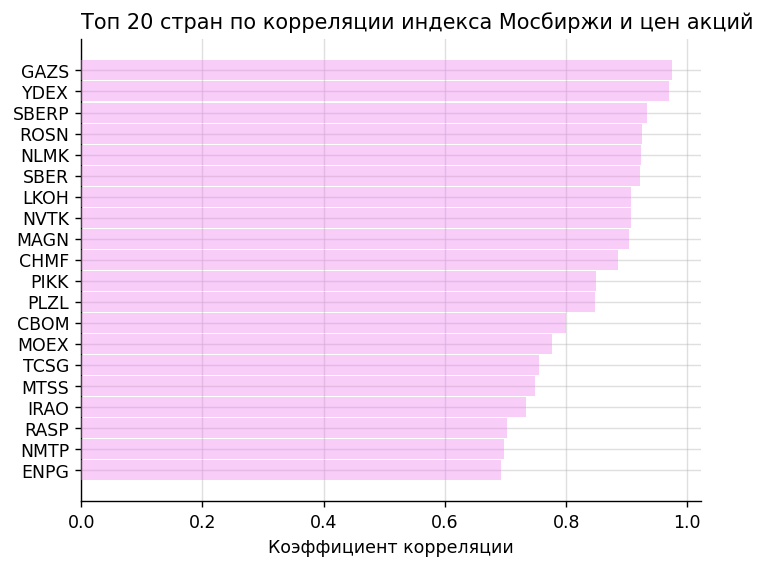

In [138]:
fig,ax = plt.subplots(dpi = 125)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.barh(y = sort_corr_top20['stock'], width=sort_corr_top20['corr'],height = 0.95,alpha = 0.4,zorder=1000,color = '#EE82EE')

ax.set_title('Топ 20 стран по корреляции индекса Мосбиржи и цен акций',loc='left')

ax.set_xlabel('Коэффициент корреляции')

ax.grid(alpha = 0.4)

# Возьму акции Сбера,Лукойла и MOEX и посчитаю корреляцию с лагом

In [140]:
Sber = (stoc_merge[stoc_merge['stock'] == 'SBER']
        .reset_index()
        .drop('index',axis = 1))

In [141]:
dano = Sber.loc[Sber[Sber['date'] == '2015-02-02'].index[0] :,].shape[0]
index = Sber[Sber['date'] == '2015-02-02'].index[0]

Коэффициент корреляции с лагом для Сбера

In [147]:
Sber.loc[index:,'price_stock'].corr(Sber.loc[:dano,'price_imoex'])

0.9218123080932532

Коэффициент корреляции с лагом для Лукойла

In [143]:
Lkoh = (stoc_merge[stoc_merge['stock'] == 'LKOH']
        .reset_index()
        .drop('index',axis = 1))
Lkoh.loc[index:,'price_stock'].corr(Lkoh.loc[:dano,'price_imoex'])

0.9381053848001596

Коэффициент корреляции с лагом для MOEX

In [144]:
MOEX = (stoc_merge[stoc_merge['stock'] == 'MOEX']
        .reset_index()
        .drop('index',axis = 1))
MOEX.loc[index:,'price_stock'].corr(MOEX.loc[:dano,'price_imoex'])

0.7945994518895333